# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM raw dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
adata.raw = adata

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8763
CD56 bright NK               449
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1357
GMP                         1281
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1000
MOP                         3838
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    353
arteriolar fibroblast         83
basophil                     139
chondrocyte                   80
early MK                    1624
early erythroid             7474
early osteoblast             280
endosteal fibroblast          5

# Add broad annotation as metadata and accompanying colours

In [8]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/resources_for_pipelines/key_fbm_broad_annots_20210104.csv")

In [9]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['adipo-CAR',
 'arteriolar fibroblast',
 'basophil',
 'CD14 monocyte',
 'CD4 T cell',
 'CD56 bright NK',
 'CD8 T cell',
 'chondrocyte',
 'CMP',
 'DC precursor',
 'DC1',
 'DC2',
 'DC3',
 'early erythroid',
 'early MK',
 'early osteoblast',
 'erythroid macrophage',
 'ELP',
 'endosteal fibroblast',
 'eo/baso/mast precursor',
 'eosinophil',
 'GMP',
 'HSC',
 'ILC precursor',
 'immature B cell',
 'immature EC',
 'late erythroid',
 'mast cell',
 'mature NK',
 'MEMP',
 'MEP',
 'mid erythroid',
 'MK',
 'promonocyte',
 'monocytoid macrophage',
 'LMPP',
 'MPP myeloid',
 'muscle',
 'muscle stem cell',
 'myelocyte',
 'myeloid DC progenitor',
 'myofibroblast',
 'naive B cell',
 'MOP',
 'neutrophil',
 'NK T cell',
 'NK progenitor',
 'osteoblast',
 'osteoblast precursor',
 'osteochondral precursor',
 'osteoclast',
 'pDC',
 'pDC progenitor',
 'pre B progenitor',
 'pre pro B progenitor',
 'pro B progenitor',
 'proliferating EC',
 'promyelocyte',
 'schwann cells',
 'sinusoidal EC',
 'stromal macrophage',

In [10]:
broad_annot = annot["broad_fig1_cell.labels"].tolist()
broad_annot_supp = annot["broad_figS1_cell.labels"].tolist()
broad_annot

['stroma',
 'stroma',
 'eo/baso/mast',
 'monocyte',
 'T_NK',
 'T_NK',
 'T_NK',
 'stroma',
 'HSC_MPP',
 'DC',
 'DC',
 'DC',
 'DC',
 'erythroid',
 'MK',
 'stroma',
 'stroma',
 'HSC_MPP',
 'stroma',
 'HSC_MPP',
 'eo/baso/mast',
 'HSC_MPP',
 'HSC_MPP',
 'T_NK',
 'B_lineage',
 'stroma',
 'erythroid',
 'eo/baso/mast',
 'T_NK',
 'HSC_MPP',
 'HSC_MPP',
 'erythroid',
 'MK',
 'monocyte',
 'stroma',
 'HSC_MPP',
 'HSC_MPP',
 'stroma',
 'stroma',
 'neutrophil',
 'HSC_MPP',
 'stroma',
 'B_lineage',
 'monocyte',
 'neutrophil',
 'T_NK',
 'T_NK',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'DC',
 'HSC_MPP',
 'B_lineage',
 'B_lineage',
 'B_lineage',
 'stroma',
 'neutrophil',
 'stroma',
 'stroma',
 'stroma',
 'DC',
 'stroma',
 'T_NK']

In [11]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)
adata.obs["broad_figS1_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot_supp)

In [12]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].astype('category')
adata.obs["broad_fig1_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC_MPP', 'MK', 'T_NK', 'eo/baso/mast', 'erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

In [13]:
adata.obs["broad_figS1_cell.labels"] = adata.obs["broad_figS1_cell.labels"].astype('category')
adata.obs["broad_figS1_cell.labels"].cat.categories

Index(['B_lineage', 'CD14 monocyte', 'DC1', 'DC2', 'DC_other', 'HSC_MPP', 'MK', 'T_NK', 'basophil', 'eosinophil', 'erythroid', 'mast cell', 'myelocyte', 'neutrophil', 'pDC', 'promonocyte', 'promyelocyte', 'stroma'], dtype='object')

# Replot UMAP

In [14]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].cat.reorder_categories(['HSC_MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'])

In [15]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].astype('category')
adata.obs["broad_fig1_cell.labels"].cat.categories

Index(['HSC_MPP', 'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'], dtype='object')

In [16]:
adata.obs["broad_fig1_cell.labels"].cat.categories[2]

'MK'

In [17]:
new_colors = np.empty(len(adata.obs["broad_fig1_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B lineage
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#a9479a' # eo/baso/mast
new_colors[[6]] = '#f3c3db' # neutrophil
new_colors[[7]] = '#86b3e0' # monocyte
new_colors[[8]] = '#d43d6a' # TNK
new_colors[[9]] = '#48b9b4' # stroma

adata.uns["broad_fig1_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#a9479a',
       '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'], dtype=object)

In [18]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8763
CD56 bright NK               449
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1357
GMP                         1281
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1000
MOP                         3838
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    353
arteriolar fibroblast         83
basophil                     139
chondrocyte                   80
early MK                    1624
early erythroid             7474
early osteoblast             280
endosteal fibroblast          5

In [19]:
cell_numbers = adata.obs.groupby(["broad_fig1_cell.labels"]).apply(len)
cell_numbers

broad_fig1_cell.labels
HSC_MPP          3795
erythroid       26407
MK               2624
B_lineage       28583
DC               2459
eo/baso/mast     1108
neutrophil      10486
monocyte        20038
T_NK             1349
stroma           6379
dtype: int64

In [20]:
cell_numbers = adata.obs.groupby(["cell.labels", "broad_fig1_cell.labels"]).apply(len)
cell_numbers

cell.labels              broad_fig1_cell.labels
CD4 T cell               T_NK                        327
CD8 T cell               T_NK                        171
CD14 monocyte            monocyte                   8763
CD56 bright NK           T_NK                        449
CMP                      HSC_MPP                     425
DC1                      DC                           50
DC2                      DC                          598
DC3                      DC                          705
DC precursor             DC                          201
ELP                      HSC_MPP                    1357
GMP                      HSC_MPP                    1281
HSC                      HSC_MPP                      92
ILC precursor            T_NK                         67
LMPP                     HSC_MPP                      34
MEMP                     HSC_MPP                      16
MEP                      HSC_MPP                     269
MK                       MK             

# Pre-process the total dataset

In [21]:
# normalise count data 
sc.pp.normalize_total(adata)

In [22]:
# log the count data 
sc.pp.log1p(adata)

In [23]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [24]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [25]:
# run pca
sc.tl.pca(adata, n_comps=50)

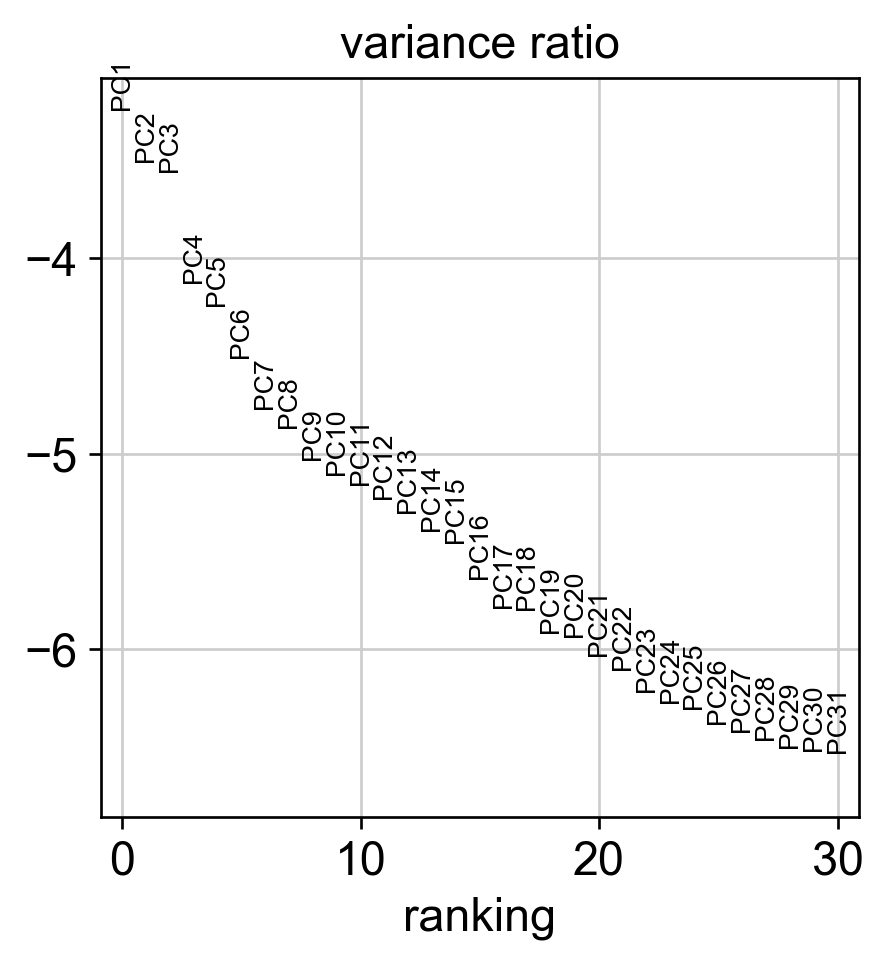

In [26]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [27]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=30) 

In [28]:
# run umap
sc.tl.umap(adata) 

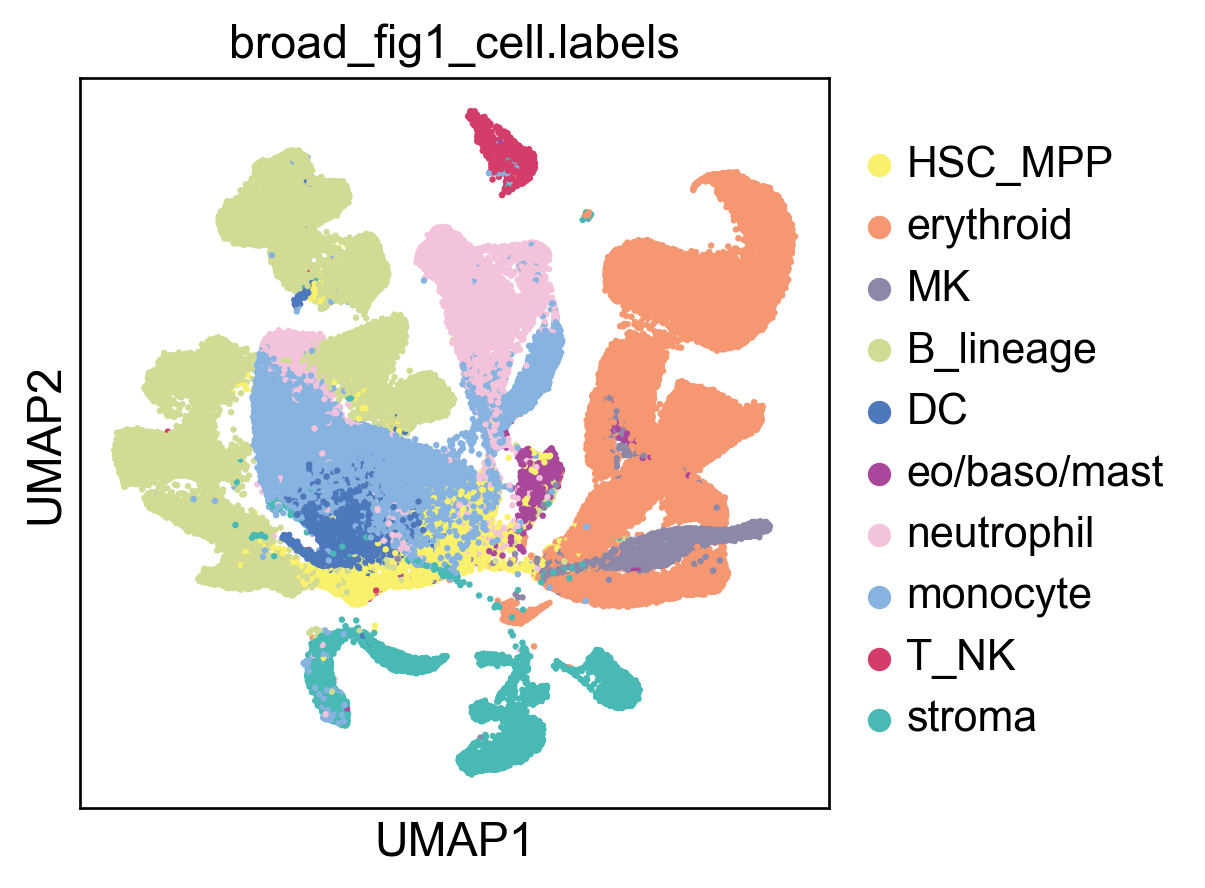

In [29]:
sc.pl.umap(adata, color=['broad_fig1_cell.labels'], size=15) 

In [30]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_pre-harmony_20210104_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_pre-harmony_20210104_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_pre-harmony_20210104_labels_broad_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_pre-harmony_20210104_labels_broad_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_fbm_pre-harmony_20210104_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_fbm_pre-harmony_20210104_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_fbm_pre-harmony_20210104_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_fbm_pre-harmony_20210104_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Run harmony batch correction

In [31]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [32]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [33]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony converged after 6 iterations



In [34]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add UMAP 

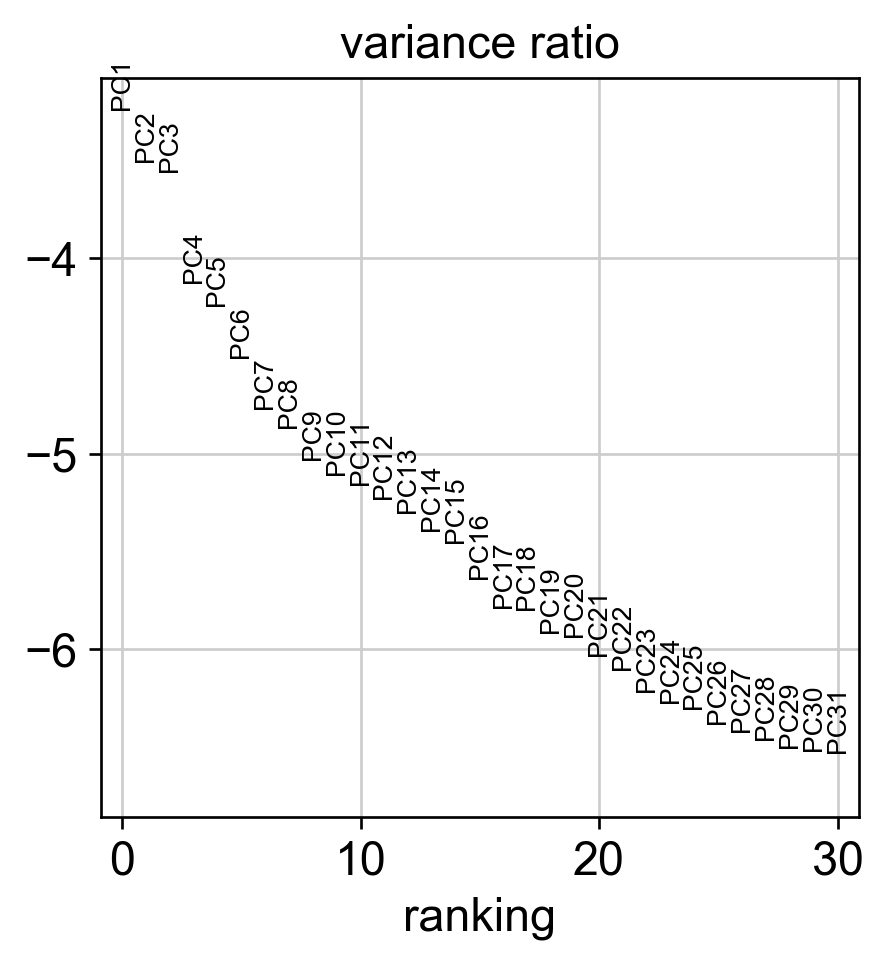

In [35]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [36]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=20) 

In [37]:
# run umap
sc.tl.umap(adata) 

# Plot UMAP

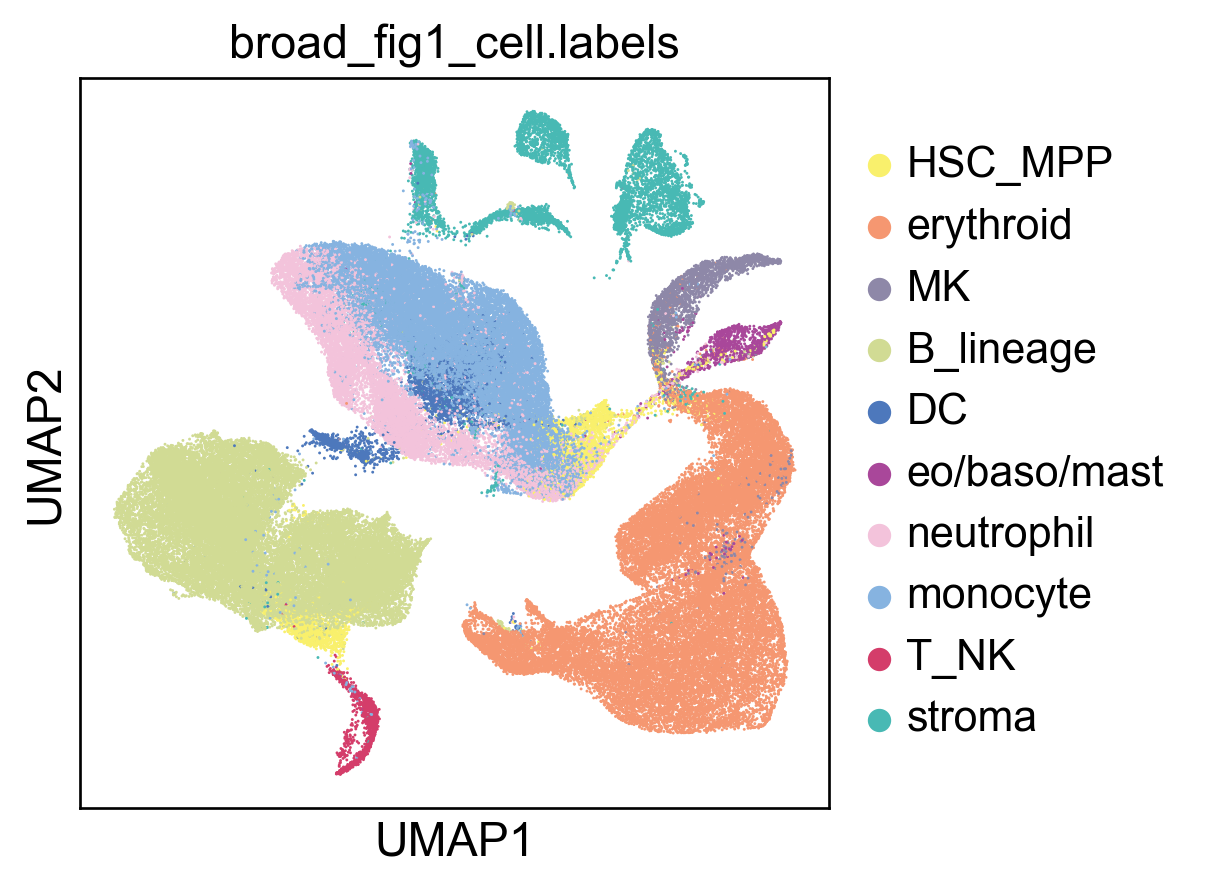

In [38]:
sc.pl.umap(adata, color=['broad_fig1_cell.labels'], size=3)

In [39]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_post-harmony_20210104_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_post-harmony_20210104_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_post-harmony_20210104_labels_broad_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_post-harmony_20210104_labels_broad_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_fbm_post-harmony_20210104_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_fbm_post-harmony_20210104_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_fbm_post-harmony_20210104_sample_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='orig.ident', save='_fbm_post-harmony_20210104_sample_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

# Save the data

In [40]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [41]:
adata.X

<103228x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 208670520 stored elements in Compressed Sparse Row format>

In [42]:
adata.raw.X

<103228x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 226711717 stored elements in Compressed Sparse Row format>

In [43]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig1b_fbm_scaled_gex_updated_dr_20210104.h5ad")

In [44]:
adata.shape

(103228, 33712)

In [45]:
pd.DataFrame(adata.obsm["X_umap"]).to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fbm_umap_20210104.csv")